<a href="https://colab.research.google.com/github/hugoplm/bitcoin-candlestick/blob/main/Organizing_Pictures_Transfer_Learning/Organizing_Pictures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using Deep Learning to Organize Your Pictures

How to easily rename your pictures based on their predicted class using a trained Convolutional Neural Network in TensorFlow.

Deep Learning is a subfield of machine learning that uses multi-layered neural networks to extracts patterns from data. Normally, it takes a long time to build and train a high-accuracy model. However, what if you could get a model that was built and trained by an expert and apply it to solve your problems? Well, you can! And it may takes just a few lines of coding.

This is called Transfer Learning, which is a technique that reuses a model created by a machine learning expert and that has already been trained on a large dataset.

My objective within this project is to present how to easily apply Transfer Learning to help you organizing your pictures by renaming them with the predicted class from a trained Convolutional Neural Network.

##Getting the Model

In this project, we are going to use the MobileNet V2 Model which is a trained model for image classification. It was trained using the ImageNet dataset, and it has 1001 classes. The MobileNet V2 Model is available in the <a href="https://www.tensorflow.org/hub">TensorFlow Hub</a>, which is a repository where we can find trained machine learning models. I won't cover all the details of the model in this article, but if you are interested in learning more about it, I recommend you take a look at the <a href="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4">documentation</a>.

In [ ]:
# importing the libraries
import tensorflow as tf
import numpy as np
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os

The model is a SavedModel in TensorFlow 2 format. We can get it using the KerasLayer method, proving the URL and input_shape parameters. These information can be found in the documentation of the model.

In [ ]:
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

model = tf.keras.Sequential([
    hub.KerasLayer(url, input_shape=(224, 224, 3))
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


Furthermore, we need to get the 1001 classes of the ImageNet dataset. We can do it by downloading the TXT file with this information and saving it as a numpy array.

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

In [ ]:
imagenet_labels = np.array(open(labels_path).read().splitlines())

## Making Predictions

The first step here is to create a list containing the filename of the images in the directory. For this project, I will use 20 different images that I had on my phone renamed to *`ImageXX`*.

In [ ]:
dir = "/content/Images/"
image_dir = os.listdir(dir)
image_dir

['Image17.jpeg',
 'Image14.jpg',
 'Image07.jpeg',
 'Image13.jpeg',
 'Image02.jpeg',
 'Image01.jpg',
 'Image06.jpg',
 'Image16.jpg',
 'Image05.jpeg',
 'Image19.jpg',
 'Image18.jpeg',
 'Image12.jpeg',
 'Image20.jpg',
 'Image08.jpg',
 'Image04.jpeg',
 'Image09.jpg',
 'Image11.jpeg',
 'Image10.jpeg',
 'Image03.jpeg',
 'Image15.jpeg']

Let's define a function that receives the path of an image and returns the predicted class and the image array. In this function, the image will be loaded in the right size, normalized and transformed to a numpy array before making the prediction.

In [ ]:
def pred_class(img):
  
  loaded_image =  tf.keras.preprocessing.image.load_img(img, color_mode='rgb', 
                                                        target_size=(224,224),
                                                        interpolation='nearest')
  
  image_arr = np.array(loaded_image)/255.

  pred = model.predict(image_arr[np.newaxis, :])
  predicted_class = imagenet_labels[np.argmax(pred)]

  return predicted_class, image_arr

Now, we can loop through our list of image and predict the class for each of them. We will save the predicted classes and the image array in lists to be used in the next steps.

In [ ]:
predicted_classes = []
images_arr = []

for image in image_dir:
  image_path = dir + image
  predicted_class, image_arr = pred_class(image_path)
  predicted_classes.append(predicted_class)
  images_arr.append(image_arr)

Then, we can plot our images and the respective predicted class.

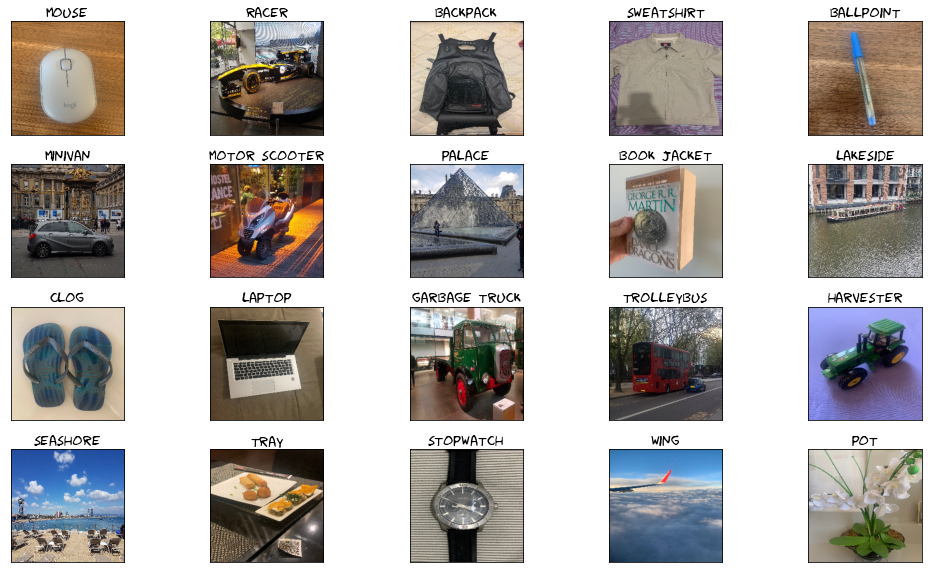

In [ ]:
plt.figure(figsize=(14,10))
for i in range(20):
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img = images_arr[i]
    pred_class = predicted_classes[i]

    plt.imshow(img)
    plt.title(label= f'{pred_class}',fontdict={'family':'fantasy', 'size': 14})

plt.tight_layout()
plt.show()

## Renaming the Images

After visualizing the images with the respective classes, let's rename our files. It will have the predicted class as the filename keeping the original extension.

In [ ]:
for i, image in enumerate(image_dir):
  old_name = dir + image
  new_name = dir + predicted_classes[i] + image[7:]
  os.rename(old_name, new_name)

Our last step will be to create a ZIP file with all the 20 renamed images and downloading it from Google Colab.

In [ ]:
!zip -r images.zip /content/Images

  adding: content/Images/ (stored 0%)
  adding: content/Images/racer.jpg (deflated 0%)
  adding: content/Images/book jacket.jpeg (deflated 1%)
  adding: content/Images/tray.jpeg (deflated 0%)
  adding: content/Images/backpack.jpeg (deflated 0%)
  adding: content/Images/trolleybus.jpg (deflated 0%)
  adding: content/Images/clog.jpeg (deflated 1%)
  adding: content/Images/seashore.jpg (deflated 0%)
  adding: content/Images/motor scooter.jpg (deflated 0%)
  adding: content/Images/pot.jpeg (deflated 1%)
  adding: content/Images/wing.jpeg (deflated 1%)
  adding: content/Images/mouse.jpeg (deflated 0%)
  adding: content/Images/ballpoint.jpeg (deflated 0%)
  adding: content/Images/lakeside.jpg (deflated 0%)
  adding: content/Images/stopwatch.jpeg (deflated 1%)
  adding: content/Images/laptop.jpeg (deflated 0%)
  adding: content/Images/harvester.jpeg (deflated 1%)
  adding: content/Images/palace.jpg (deflated 0%)
  adding: content/Images/sweatshirt.jpeg (deflated 0%)
  adding: content/Images/m

In [ ]:
from google.colab import files
files.download("/content/images.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You can find the renamed pictures in this repository
<a href="https://github.com/hugoplm/computer-vision/tree/main/Organizing_Pictures_Transfer_Learning/renamed-pictures">repository</a>.

## Conclusion

This project presented how to use the MobileNet V2 Model to predict classes of random pictures. Using Transfer Learning can save us a lot of time and achieve a really good accuracy. As we could see, the model predicted the right class for some images, like backpack, laptop, motor scooter, and seashore. While for other cases, even it didn't predict the right class, we got a really close one, like sweatshirt, clog, and garbage truck.

In case you are instersted in learning how to train your own Convolutional Neural Network using TensorFlow, I recommend you take a look at my previous project:

<a href="https://medium.com/analytics-vidhya/classifying-images-of-clothing-using-tensorflow-39ec3c1cb8b7">Classifying Images of Clothing Using TensorFlow</a>

Should you have any questions or feedbacks about this project, feel free to contact me on <a href="https://www.linkedin.com/in/hugoplm/">LinkedIn</a>.
